In [1]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sf
from imblearn.over_sampling import SMOTE

In [2]:
#importing Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
x = df.iloc[:,:-1]

In [6]:
y = df.iloc[:,30]

In [7]:
df_fraud = df.loc[df.Class == 1] 
df_non_fraud = df.loc[df.Class == 0]

In [10]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [11]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25, random_state=42)

In [13]:
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20
21293,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,...,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95
133600,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,...,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00
38225,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,...,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [14]:
ytrain

83225     0
52800     0
21293     0
133600    0
38225     0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 213605, dtype: int64

In [15]:
#ROC
def plot_roc_auc(ytest, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(ytest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [16]:
#base accuracy
print("Base accuracy score we must beat is: ", 
      df_non_fraud.Class.count()/ np.add(df_non_fraud.Class.count(),df_fraud.Class.count()) * 100)

Base accuracy score we must beat is:  99.82725143693798


In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
DT = DecisionTreeClassifier()

In [19]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
Dt_pred = DT.predict(xtest)

In [21]:
Dt_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
accuracy_score(ytest,Dt_pred)

0.9991994606893064

In [23]:
confusion_matrix(ytest,Dt_pred)

array([[71058,    31],
       [   26,    87]], dtype=int64)

In [24]:
print(classification_report(ytest,Dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.74      0.77      0.75       113

    accuracy                           1.00     71202
   macro avg       0.87      0.88      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [25]:
cm = confusion_matrix(ytest,Dt_pred)

<AxesSubplot:>

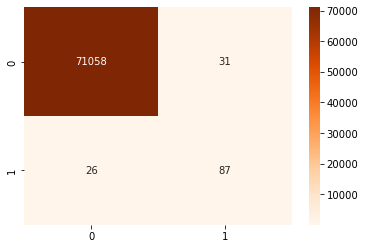

In [26]:
sf.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=True, annot_kws={"size":10})

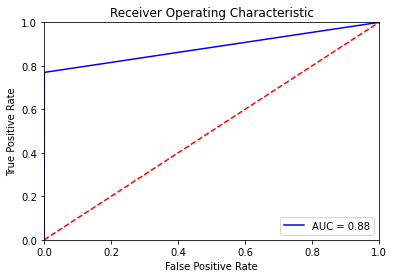

In [27]:
plot_roc_auc(ytest, DT.predict_proba(xtest)[:,1])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LRG = LogisticRegression()

In [30]:
LRG.fit(xtrain,ytrain)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lrg_pred = LRG.predict(xtest)

In [32]:
lrg_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(ytest,lrg_pred)

0.9987640796606837

In [34]:
confusion_matrix(ytest,lrg_pred)

array([[71048,    41],
       [   47,    66]], dtype=int64)

In [35]:
print(classification_report(ytest,lrg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.62      0.58      0.60       113

    accuracy                           1.00     71202
   macro avg       0.81      0.79      0.80     71202
weighted avg       1.00      1.00      1.00     71202



In [36]:
cm = confusion_matrix(ytest,lrg_pred)

<AxesSubplot:>

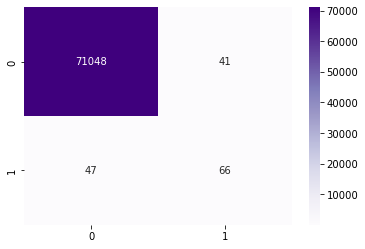

In [37]:
sf.heatmap(cm,annot=True,cmap="Purples",fmt="d",cbar=True, annot_kws={"size":10})

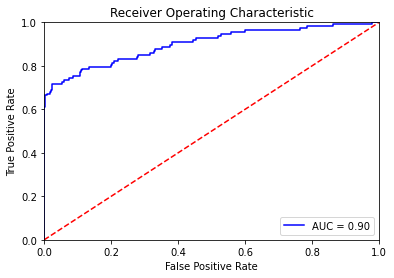

In [38]:
plot_roc_auc(ytest, LRG.predict_proba(xtest)[:,1])

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
Rf = RandomForestClassifier()

In [41]:
Rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [42]:
rf_pred = Rf.predict(xtest)

In [43]:
rf_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy_score(ytest,rf_pred)

0.999592708069998

In [45]:
confusion_matrix(ytest,rf_pred)

array([[71083,     6],
       [   23,    90]], dtype=int64)

In [46]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.94      0.80      0.86       113

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [47]:
cm = confusion_matrix(ytest,rf_pred)

<AxesSubplot:>

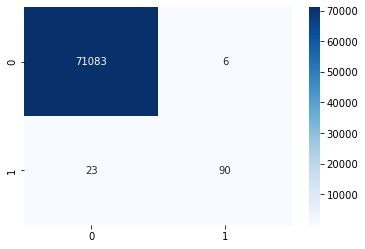

In [48]:
sf.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size":10})

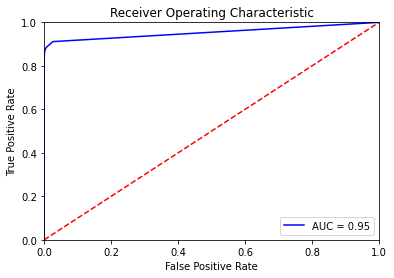

In [49]:
plot_roc_auc(ytest, Rf.predict_proba(xtest)[:,1])

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
GNB = GaussianNB()

In [52]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [53]:
gnb_pred = GNB.predict(xtest)

In [54]:
gnb_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
accuracy_score(ytest,gnb_pred)

0.9931181708378978

In [56]:
confusion_matrix(ytest,gnb_pred)

array([[70639,   450],
       [   40,    73]], dtype=int64)

In [57]:
print(classification_report(ytest,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71089
           1       0.14      0.65      0.23       113

    accuracy                           0.99     71202
   macro avg       0.57      0.82      0.61     71202
weighted avg       1.00      0.99      1.00     71202



In [58]:
cm = confusion_matrix(ytest,gnb_pred)

<AxesSubplot:>

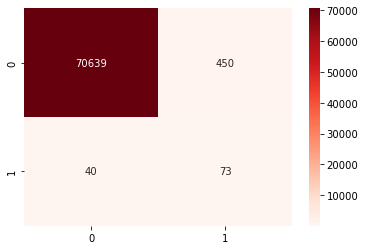

In [59]:
sf.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=True, annot_kws={"size":10})

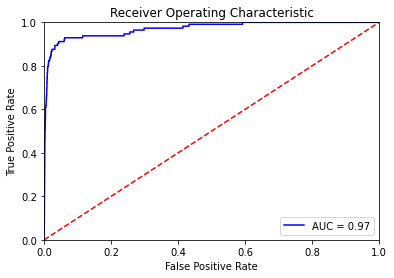

In [60]:
plot_roc_auc(ytest, GNB.predict_proba(xtest)[:,1])

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

In [63]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(p=1)

In [64]:
knn_pred = knn.predict(xtest)

In [65]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
accuracy_score(ytest,knn_pred)

0.9986236341675796

In [67]:
confusion_matrix(ytest,knn_pred)

array([[71089,     0],
       [   98,    15]], dtype=int64)

In [68]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       1.00      0.13      0.23       113

    accuracy                           1.00     71202
   macro avg       1.00      0.57      0.62     71202
weighted avg       1.00      1.00      1.00     71202



In [69]:
cm = confusion_matrix(ytest,knn_pred)

<AxesSubplot:>

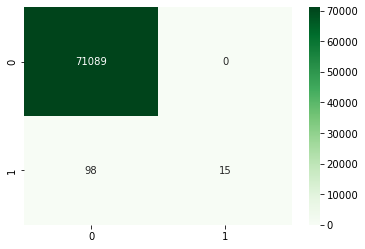

In [70]:
sf.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size":10})

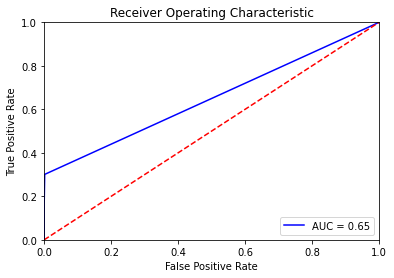

In [71]:
plot_roc_auc(ytest, knn.predict_proba(xtest)[:,1])